参考代码实现：[github/fengdu78](https://nbviewer.org/github/fengdu78/lihang-code/tree/master/)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [222]:
def real_func(x):
    return np.sin(2*np.pi*x)


def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)


# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [223]:
np.random.seed(6)
x_points = np.linspace(0, 1, 1000)
x = np.linspace(0, 1, 20)
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]  # 给每个y分别增加一个随机数
# y = real_fun(x) + np.random.normal(0, 0.1)  # 给每个y加了一个相同的随机数，类似整条曲线偏移

`leastsq(func, p_init, args=(x, y))`
- `func`：是一个函数，这个函数的第一个参数是需要优化的参数`p`，目标是通过调整`p`使得所有的`x y`带入后，对`func`求平方和数值最小
- `p_init`：需要优化的参数`p`的初始值
- `x y`：`func`的除`p`以外的参数

In [224]:
def fitting(M):
    p_init = np.random.rand(M + 1)
    
    p_lsp = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting parameters:', p_lsp[0])
    
    # 可视化
    plt.plot(x, y, 'bo', label='noise')
    plt.plot(x_points, real_fun(x_points), label='real')
    plt.plot(x_points, fit_fun(p_lsp[0], x_points), label='Fitted curve')
    plt.legend()
    
    return p_lsp

Fitting parameters: [0.02362953]


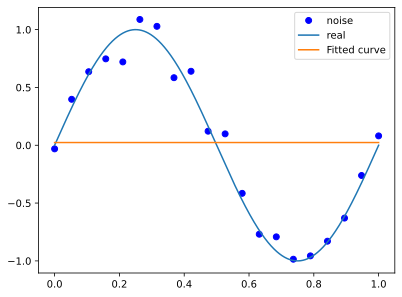

In [225]:
p_lsp_0 = fitting(M=0)

Fitting parameters: [-1.54805453  0.7976568 ]


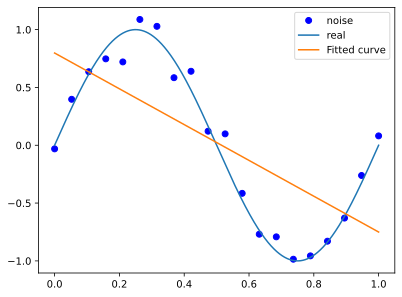

In [226]:
p_lsp_1 = fitting(M=1)

Fitting parameters: [ 21.53985575 -32.45873824  11.19664398  -0.13877036]


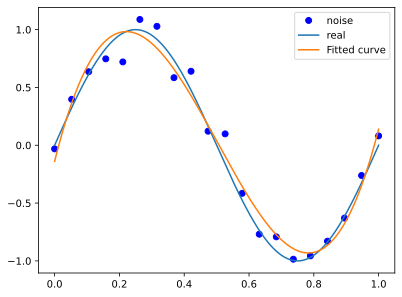

In [227]:
p_lsp_3 = fitting(M=3)

Fitting parameters: [ 1.74580183e+03 -8.73869131e+03  1.85404031e+04 -2.16788766e+04
  1.51378981e+04 -6.34223615e+03  1.51877367e+03 -1.98752811e+02
  1.58003010e+01 -3.54761860e-02]


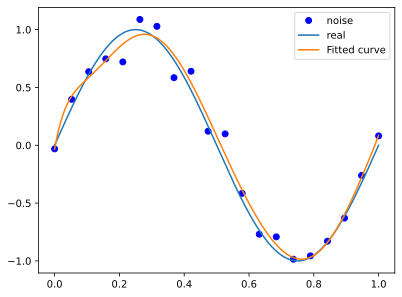

In [249]:
p_lsp_9 = fitting(M=9)

Fitting parameters: [-9.99244553e+05  3.09204511e+06 -1.89437138e+06 -2.35223976e+06
  1.73704390e+06  1.34505376e+06  5.50401253e+05 -1.61607324e+06
 -1.80106724e+06  2.13828296e+06  1.46842987e+06 -2.79975176e+06
  1.26230555e+06 -1.54626792e+03 -1.88066367e+05  6.88964405e+04
 -1.08239048e+04  7.35105510e+02 -9.36677712e+00 -3.02705447e-02]


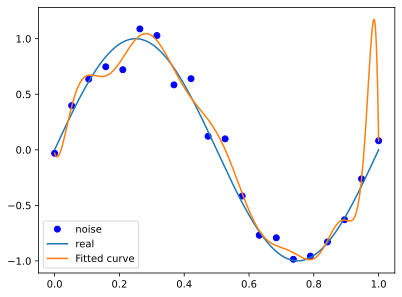

In [273]:
p_lsp_19 = fitting(M=19)

## 正则化

In [288]:
regularization = 0.00001  # 正则化的强度

# 带有正则项的损失函数
def residuals_func_regularization(p, x, y):
    """
    用 np.append(ret, 正则项)的原因：
        - 传给fit_func的x是一个ndarray，y是一个相同维度的ndarray，计算结果ret也是一个ndarray。
        - 带正则化的损失函数，是先对N个(y_real - y_fit)求平方和，然后再加上正则项
        - 因此，正则项要增加到ret这个ndarray中，而不是在每一个(y_real - y_fit)中加一个正则项
        - 最后，leastsq对包含了正则项的ret ndarray求平方和，并进行最小化优化
    """
    
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.sum(np.square(p))))  # L2范数作为正则化项
    return ret

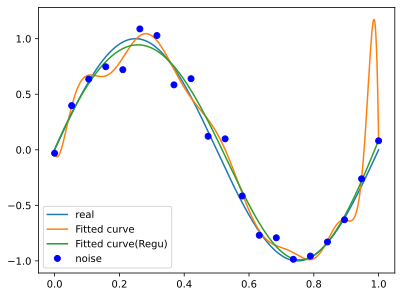

In [293]:
p_init = np.random.rand(20)
# p_lsp_regu = leastsq(residuals_func_regularization, p_init, args=(x, y))
p_lsp_regu = leastsq(residuals_func_regularization, p_init, args=(x, y))

plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsp_19[0], x_points), label='Fitted curve')
plt.plot(x_points, fit_func(p_lsp_regu[0], x_points), label='Fitted curve(Regu)')
plt.plot(x, y, 'bo', label='noise')
plt.legend()